In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import warnings
import hvplot.pandas
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

In [2]:
data = Path('compensation_experience')
df = pd.read_csv(data)
df

,totalyearlycompensation,basesalary,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,yearsofexperience,yearsatcompany
0,127000,107000.0,0,0,0,0,0,1.5,1.5
1,100000,0.0,0,0,0,0,0,5.0,3.0
2,310000,155000.0,0,0,0,0,0,8.0,0.0
3,372000,157000.0,0,0,0,0,0,7.0,5.0
4,157000,0.0,0,0,0,0,0,5.0,3.0
...,...,...,...,...,...,...,...,...,...
62637,327000,155000.0,0,0,0,0,0,10.0,1.0
62638,237000,146900.0,0,0,0,0,0,2.0,2.0
62639,220000,157000.0,0,0,0,0,0,14.0,12.0
62640,280000,194688.0,0,0,0,0,0,8.0,4.0


In [3]:
#!pip install lightgbm

In [4]:
import lightgbm as lgb

In [5]:
df.isna().sum()

totalyearlycompensation    0
basesalary                 0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
yearsofexperience          0
yearsatcompany             0
dtype: int64

In [6]:
df.yearsatcompany.value_counts().head(30)

yearsatcompany
0.00     15916
1.00     11791
2.00     10329
3.00      6989
4.00      4685
5.00      3783
6.00      2071
7.00      1392
8.00      1155
10.00      936
9.00       638
12.00      375
15.00      329
11.00      293
1.50       247
13.00      237
14.00      206
0.50       186
2.50       183
20.00      168
16.00       98
3.50        86
18.00       60
17.00       54
19.00       53
4.50        49
21.00       30
0.25        27
22.00       25
25.00       23
Name: count, dtype: int64

<Axes: xlabel='yearsatcompany'>

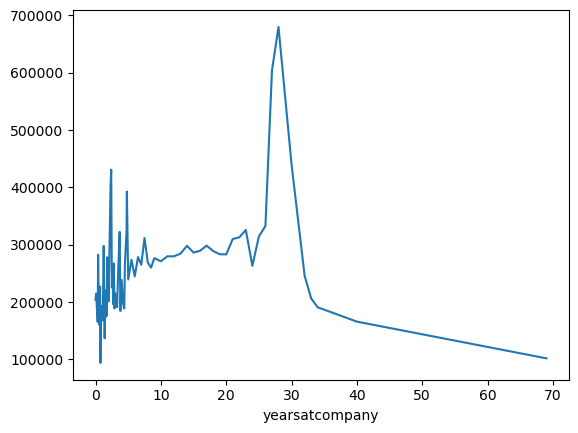

In [7]:
df.groupby(['yearsatcompany'])['totalyearlycompensation'].mean().plot()

In [8]:
y=df.basesalary

In [9]:
df.columns

Index(['totalyearlycompensation', 'basesalary', 'Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College',
       'yearsofexperience', 'yearsatcompany'],
      dtype='object')

In [10]:
X=df.drop(['totalyearlycompensation','basesalary'],axis=1)

In [11]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
params={
    'boosting_type':'gbdt',
    'objective':'regression',
    'learning_rate':0.01,
    'num_iterations':200,
    'max_depth':6,
    'num_leaves':6,
    'metric':['l1','l2']
}

In [13]:
model=lgb.LGBMRegressor(**params)

In [14]:
model.fit(X_train,y_train,
         eval_set=[(X_test,y_test)],
         eval_metric='l1',
#          early_stopping_rounds =200
         )

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 114
[LightGBM] [Info] Number of data points in the train set: 50113, number of used features: 7
[LightGBM] [Info] Start training from score 136519.499850


LGBMRegressor(learning_rate=0.01, max_depth=6, metric=['l1', 'l2'],
              num_iterations=200, num_leaves=6, objective='regression')

In [15]:
pred_y=model.predict(X_train)

In [16]:
pred1=model.predict(X_test)

In [17]:
y_test

49248     90000.0
849      134000.0
61418    160000.0
29579     88000.0
10820    225000.0
           ...   
20630    113000.0
18999    182000.0
38451    110000.0
50827     74000.0
2084     120000.0
Name: basesalary, Length: 12529, dtype: float64

In [18]:
pred=pd.DataFrame({'test':y_test, 'prediction':pred1})

In [19]:
import matplotlib.pyplot as plt

In [20]:
pred2=pred.head(100)

In [21]:
pred2=pred2.reset_index(drop=True)

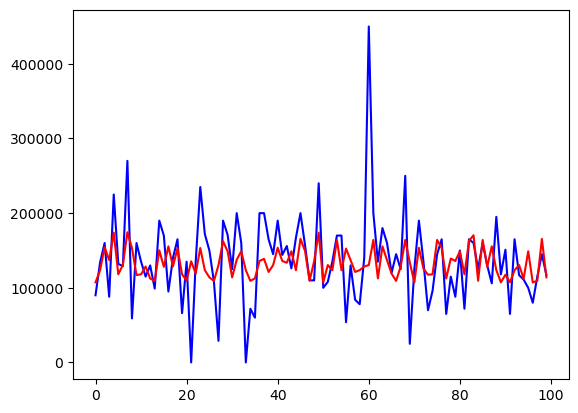

In [22]:
plt.plot(pred2.index,pred2.test, label='test',color='blue')
plt.plot(pred2.index,pred2.prediction, label='prdiction',color='red')

In [23]:
pred

,test,prediction
49248,90000.0,107323.079284
849,134000.0,123550.960798
61418,160000.0,154182.671573
29579,88000.0,137113.210777
10820,225000.0,173902.824734
...,...,...
20630,113000.0,139223.503945
18999,182000.0,145275.266862
38451,110000.0,112217.068615
50827,74000.0,113982.537253


In [24]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred1)

37726.44839532716

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, pred1)

0.17772558870160404